# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"q="+city+"&APPID="+weather_api_key+"&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | mahina
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | gadzhiyevo
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | flying fish cove
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | yazykovo
Processing Record 15 of Set 1 | chibougamau
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | jaszkiser
Processing Record 19 of Set 1 | ancud
Processing Record 20 of Set 1 | waingapu
Processing Record 21 of Set 1 | oranjemund
Processing Record 22 of Set 1 | aykol
City not

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,17.72,99,100,4.28,SH,1703907496
1,mahina,-17.5065,-149.4890,29.87,74,40,4.12,PF,1703907497
2,saipan,15.1355,145.7010,29.39,70,40,8.75,MP,1703907497
3,lebu,-37.6167,-73.6500,12.82,89,2,5.31,CL,1703907497
4,grytviken,-54.2811,-36.5092,-0.54,76,79,3.17,GS,1703907497


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,17.72,99,100,4.28,SH,1703907496
1,mahina,-17.5065,-149.4890,29.87,74,40,4.12,PF,1703907497
2,saipan,15.1355,145.7010,29.39,70,40,8.75,MP,1703907497
3,lebu,-37.6167,-73.6500,12.82,89,2,5.31,CL,1703907497
4,grytviken,-54.2811,-36.5092,-0.54,76,79,3.17,GS,1703907497


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

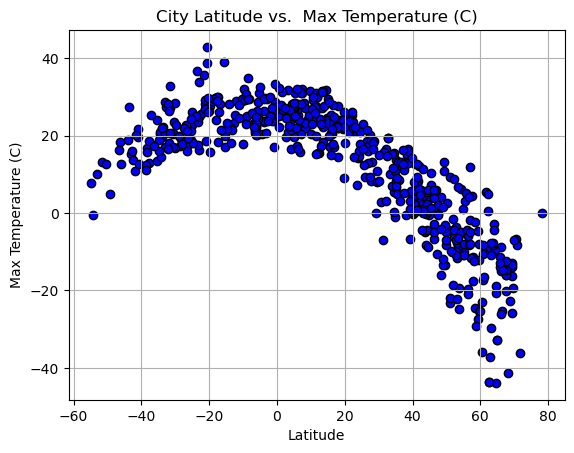

In [133]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(latitude,temp,marker ="o",facecolors = "blue",edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs.  Max Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

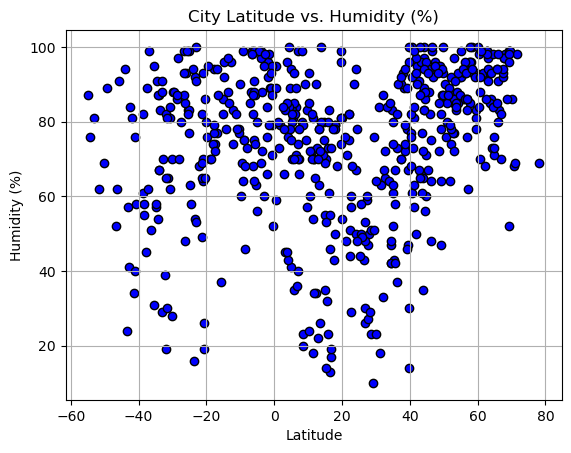

In [134]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude,humidity,marker ="o",facecolors = "blue",edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

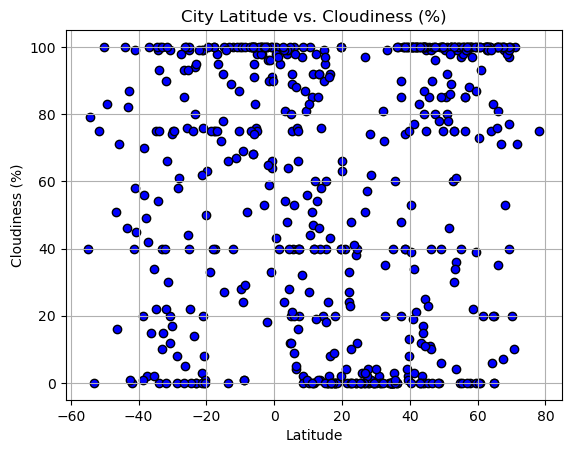

In [135]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloud = city_data_df["Cloudiness"]
plt.scatter(latitude,cloud,marker ="o",facecolors = "blue",edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

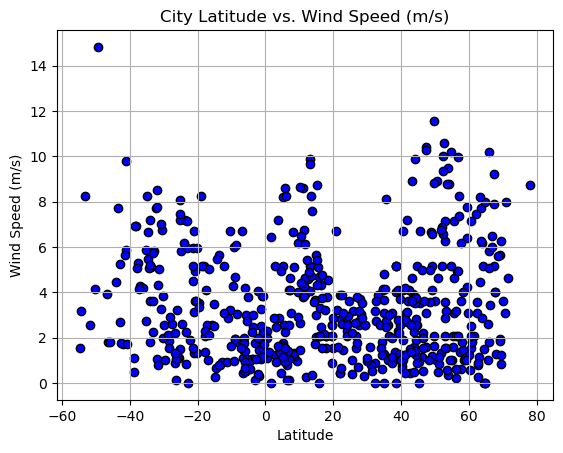

In [136]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind = city_data_df["Wind Speed"]
plt.scatter(latitude,wind,marker ="o",facecolors = "blue",edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [117]:
# Define a function to create Linear Regression plots
def linfunc(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regressval = x * slope + intercept 
    plt.scatter(x,y,marker ="o",facecolors = "blue",edgecolors = "black")
    plt.plot(x,regressval,"r-")
    plt.annotate(equation,(a,b),fontsize=15,color="red")
    plt.grid
    xlabel = "Latitude"
    label = abel
    ylabel = label
    plt.xlabel(xlabel)
    plt.ylabel(label)
    print(f"The r-value is: {rvalue}")
    plt.show
    return 

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saipan,15.1355,145.7010,29.39,70,40,8.75,MP,1703907497
5,gadzhiyevo,69.2551,33.3362,-13.98,99,97,1.93,RU,1703907498
9,sitka,57.0531,-135.3300,11.94,62,100,8.23,US,1703907316
10,albany,42.6001,-73.9662,5.91,91,100,0.45,US,1703907499
12,isafjordur,66.0755,-23.1240,-8.82,80,35,1.81,IS,1703907499


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,17.72,99,100,4.28,SH,1703907496
1,mahina,-17.5065,-149.4890,29.87,74,40,4.12,PF,1703907497
3,lebu,-37.6167,-73.6500,12.82,89,2,5.31,CL,1703907497
4,grytviken,-54.2811,-36.5092,-0.54,76,79,3.17,GS,1703907497
6,port elizabeth,-33.9180,25.5701,19.62,87,0,7.20,ZA,1703907498


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8862220797305416


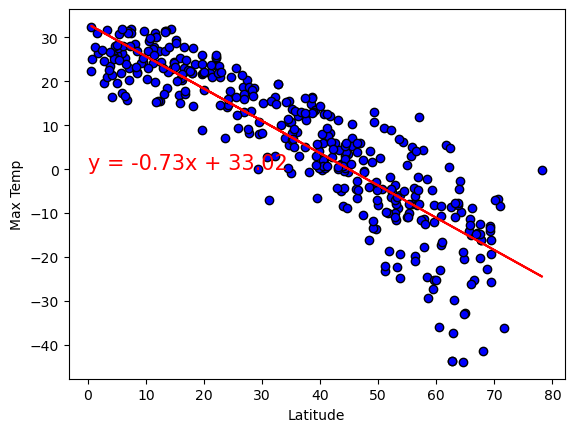

In [118]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
abel='Max Temp'
a=0
b=0
linfunc(x,y)

The r-value is: 0.5654837955861743


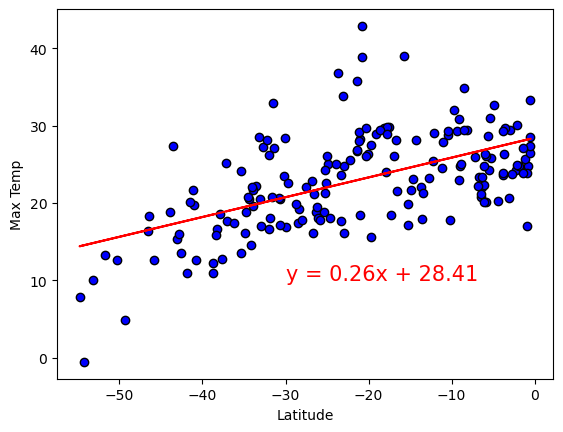

In [132]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
abel='Max Temp'
a=-30
b=10
linfunc(x,y)

**Discussion about the linear relationship:** Both r-values in both hemisphere were very high signifying a strong corelation between latitude and temperature in our data sets. In the case of the northern hemisphere, theres a negative regression model which signifies the higher the latitude the lower the temperature. In the case of the southern hemisphere, theres a positive regression model which signifies the higher the latitude the higher the temperature

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4021674243768715


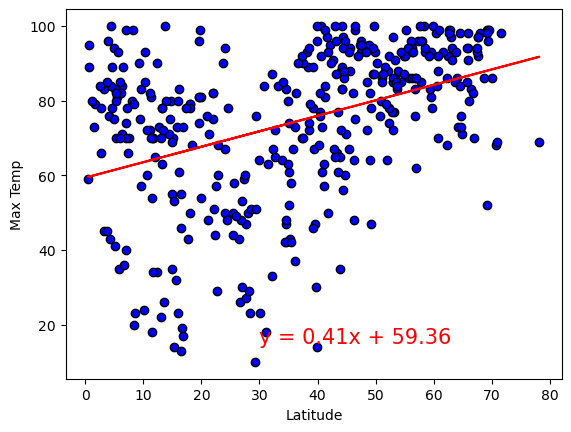

In [120]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
a=30
b=15
linfunc(x,y)

The r-value is: 0.28375391069453676


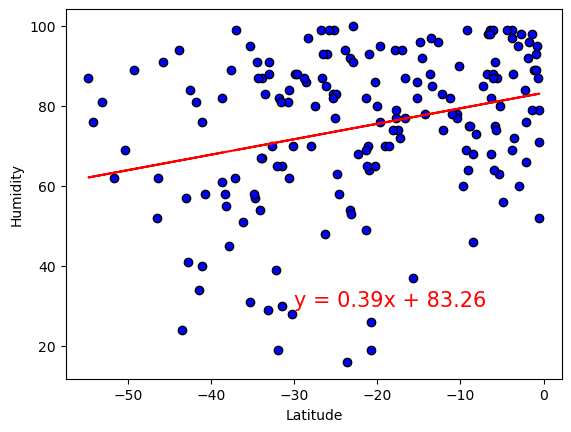

In [123]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
abel = "Humidity"
a=-30
b=30
linfunc(x,y)

**Discussion about the linear relationship:** Not only were our r-value relatively weak, the slope of the regression model for both hemisphere were both positive. This signifies regardless of a weak correlation between latitude and humidity, it wasn't also a great factor in considering what factors play a difference between the northern and southern hemisphere via latitutde. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2793723951969724


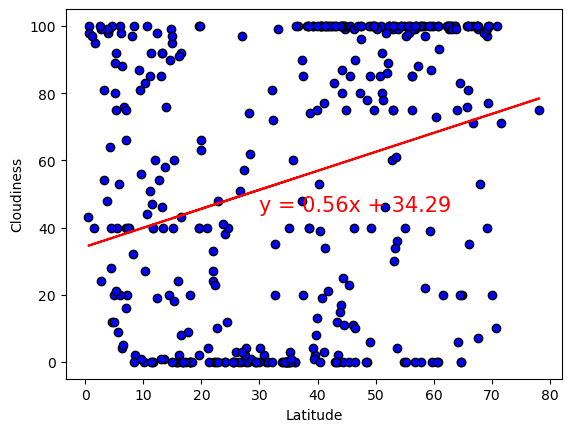

In [124]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
abel = "Cloudiness"
a=30
b=45
linfunc(x,y)

The r-value is: 0.3121979454231429


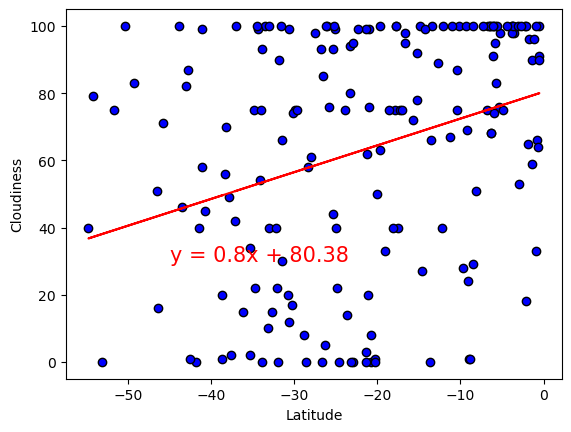

In [131]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
abel = "Cloudiness"
a=-45
b=30
linfunc(x,y)

**Discussion about the linear relationship:** Not only were our r-value relatively weak, the slope of the regression model for both hemisphere were both positive. This signifies regardless of a weak correlation between latitude and cloudiness, it wasn't also a great factor in considering what factors play a difference between the northern and southern hemisphere via latitutde. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13222777894277807


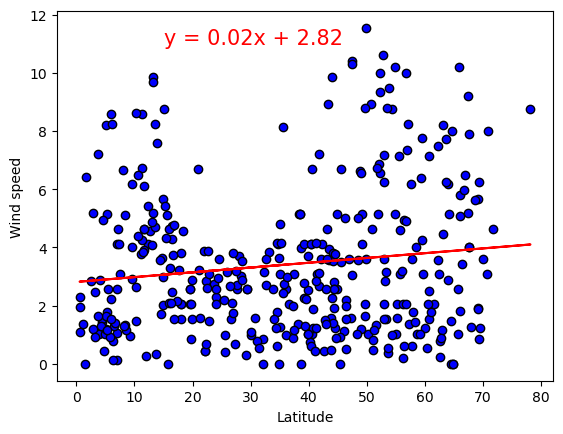

In [129]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
abel = "Wind speed"
a=15
b=11
linfunc(x,y)

The r-value is: -0.38565720876655596


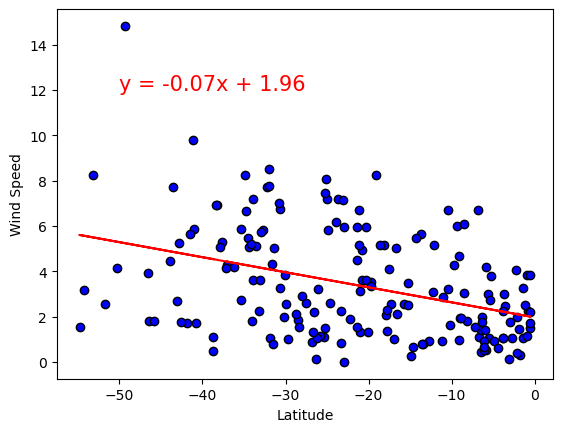

In [130]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
abel = "Wind Speed"
a=-50
b=12
linfunc(x,y)

**Discussion about the linear relationship:** Both the northern and southern hemisphere had a very low r value. It can be concluded that regardless of which hemisphere, wind speed isn't a good dependent on the latitude of our data set. Regardless it seems the northern hemisphere has slightly more wind than the southern hemisphere based on latitutde. 